In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
link = pd.read_csv(r"C:\Users\Sonu Vikas\Desktop\AIMLDL\Hackthon 2024\links.csv")

In [14]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [15]:
movie = pd.read_csv(r"C:\Users\Sonu Vikas\Desktop\AIMLDL\Hackthon 2024\movies.csv")

In [16]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [21]:
print(movie.shape)

(9742, 3)


In [17]:
rating = pd.read_csv(r"C:\Users\Sonu Vikas\Desktop\AIMLDL\Hackthon 2024\ratings.csv")

In [18]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [22]:
print(rating.shape)

(100836, 4)


In [24]:
rating.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [25]:
unique_user_count = rating['userId'].nunique()
print("Number of unique userId: ", unique_user_count)

Number of unique userId:  610


In [50]:
max_ratings_movie_id = rating['movieId'].value_counts().idxmax()
max_ratings_movie_title = movie.loc[movie['movieId'] == max_ratings_movie_id, 'title'].values[0]

print("Movie with maximum number of ratings: ", max_ratings_movie_title)


Movie with maximum number of ratings:  Forrest Gump (1994)


In [51]:
matrix_movie_id = movie.loc[movie['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = tag.loc[tag['movieId'] == matrix_movie_id, 'tag']

print("Tags for Matrix, The (1999):")
print(matrix_tags)


Tags for Matrix, The (1999):
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [52]:
terminator_2_ratings = rating.loc[rating['movieId'] == movie.loc[movie['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0], 'rating']
average_rating = terminator_2_ratings.mean()

print("Average user rating for Terminator 2: Judgment Day (1991):", average_rating)


Average user rating for Terminator 2: Judgment Day (1991): 3.970982142857143


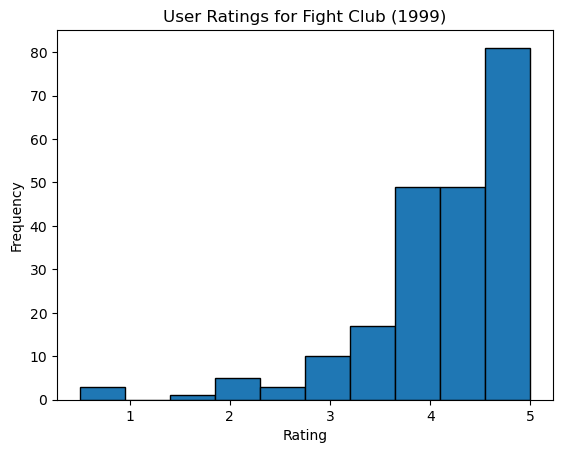

In [53]:
import matplotlib.pyplot as plt


fight_club_ratings = rating.loc[rating['movieId'] == movie.loc[movie['title'] == 'Fight Club (1999)', 'movieId'].values[0], 'rating']

# Plot the histogram
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [54]:
movies_ratings = pd.merge(rating, movie[['movieId', 'title']], on='movieId', how='inner')

average_ratings = movies_ratings.groupby('title')['rating'].mean()

movie_list = ["Godfather, The (1972)", "Shawshank Redemption, The (1994)", "Jumanji (1995)", "Wolf of Wall Street, The (2013)"]

for movie_title in movie_list:
    average_rating = average_ratings.loc[movie_title]
    print(f"Average rating for {movie_title}: {average_rating:.2f}")


Average rating for Godfather, The (1972): 4.29
Average rating for Shawshank Redemption, The (1994): 4.43
Average rating for Jumanji (1995): 3.43
Average rating for Wolf of Wall Street, The (2013): 3.92


In [55]:
top_movies = rating['movieId'].value_counts().head(5)

top_movie_titles = movie.loc[movie['movieId'].isin(top_movies.index), 'title']

print("Top 5 popular movies based on number of user ratings:")
print(top_movie_titles)


Top 5 popular movies based on number of user ratings:
257                  Pulp Fiction (1994)
277     Shawshank Redemption, The (1994)
314                  Forrest Gump (1994)
510     Silence of the Lambs, The (1991)
1939                  Matrix, The (1999)
Name: title, dtype: object


In [56]:
import pandas as pd

movies_ratings = pd.merge(rating, movie[['movieId', 'title', 'genres']], on='movieId', how='inner')

sci_fi_movies_ratings = movies_ratings[movies_ratings['genres'].str.contains('Sci-Fi')]

sci_fi_movies_ratings_count = sci_fi_movies_ratings['movieId'].value_counts()

third_most_popular_sci_fi_movie_id = sci_fi_movies_ratings_count.index[2]

third_most_popular_sci_fi_movie_title = movie.loc[movie['movieId'] == third_most_popular_sci_fi_movie_id, 'title'].values[0]

print("Third most popular Sci-Fi movie based on number of user ratings:", third_most_popular_sci_fi_movie_title)


Third most popular Sci-Fi movie based on number of user ratings: Jurassic Park (1993)


In [57]:
import pandas as pd

sci_fi_movie_titles = ["Deadpool (2016)", "Terminator 2: Judgment Day (1991)", "X-Men: The Last Stand (2006)", "Jurassic Park (1993)"]

movies_ratings = pd.merge(rating, movie[['movieId', 'title']], on='movieId', how='inner')

filtered_sci_fi_movies_ratings = movies_ratings[(movies_ratings['title'].isin(sci_fi_movie_titles))]

sci_fi_movies_ratings_count = filtered_sci_fi_movies_ratings.groupby('title')['rating'].count()

third_most_popular_sci_fi_movie_title = sci_fi_movies_ratings_count.nlargest(3).index[-1]

print("Third most popular Sci-Fi movie based on number of user ratings:", third_most_popular_sci_fi_movie_title)


Third most popular Sci-Fi movie based on number of user ratings: Deadpool (2016)


In [59]:
movie_with_highest_imdb_rating = movie.loc[movie['movieId'].idxmax()]

highest_imdb_rating_movie_id = movie_with_highest_imdb_rating['movieId']

print("MovieId of the movie with the highest IMDB rating:", highest_imdb_rating_movie_id)

max_ratings_movie_id = rating['movieId'].value_counts().idxmax()

max_ratings_movie_title = movie.loc[movie['movieId'] == max_ratings_movie_id, 'title'].values[0]

print("Movie with maximum number of ratings: ", max_ratings_movie_title)


MovieId of the movie with the highest IMDB rating: 193609
Movie with maximum number of ratings:  Forrest Gump (1994)


In [58]:
import pandas as pd

sci_fi_movies = movie[movie['genres'].str.contains('Sci-Fi')]

highest_imdb_rating_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['movieId'].idxmax()]

highest_imdb_rating_sci_fi_movie_id = highest_imdb_rating_sci_fi_movie['movieId']

print("MovieId of the Sci-Fi movie with the highest IMDb rating:", highest_imdb_rating_sci_fi_movie_id)


MovieId of the Sci-Fi movie with the highest IMDb rating: 193565


In [19]:
tag = pd.read_csv(r"C:\Users\Sonu Vikas\Desktop\AIMLDL\Hackthon 2024\tags.csv")

In [20]:
tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
